<center> <h1> Housing Data </h1> </center>

The data contains information from the 1990 California census (recensement). The data is related to the houses found in a given California district and some summary stats about them based on the 1990 census data. California district is divided into smallest geographical unit call blocks. Block Groups have a population of 600 to 3,000 people. 


![image.png](https://upload.wikimedia.org/wikipedia/commons/a/a4/2010_census_reapportionment.svg)
![california discrits](https://higherlogicdownload.s3.amazonaws.com/CSDA/b24702e8-8a42-4614-8c45-bc3cba37ea2c/UploadedImages/About_CSDA/Network_Map_11_19.png)
![blocks](http://proximityone.com/graphics/cacc0648010.gif)

Data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:

1. longitude: A measure of how far west a house is. A higher value is farther west

2. latitude: A measure of how far north a house is. A higher value is farther north

3. housingMedianAge: Median age of a house within a block. A lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/seaocean_proximity

-----------------------
-------------------------
# Viewing the data

In [1]:
import pandas as pd
import numpy as np
housing = pd.read_csv("../../dataset/housing.csv")

When dealing with large DataFrames, it is useful to get a quick overview of its content. Pandas offers a few functions for this. First, let's create a large DataFrame with a mix of numeric values, missing values and text values. Notice how Jupyter displays only the corners of the DataFrame:

In [2]:
housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

The `head()` method returns the top 5 rows:

In [84]:
housing.head(10)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84                52.0       3549.0           707.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
5       413.0       193.0         4.0368            269700.0        NEAR BAY  
6      1094.0       514.0         3.6591            299200.0        NEAR BAY  
7      1157.0       647.0         3.1200            241400.0        NEAR BAY  
8      1206.0       595.0         2.0804            226700.0        NEAR BAY  
9      1551.0       714.0         3.6912            261100.0        NEAR BAY

Of course there's also a tail() function to view the bottom 5 rows. You can pass the number of rows you want:

In [85]:
housing.tail(n=2)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
20638          INLAND  
20639          INLAND

You can also get random samples

In [86]:
housing.sample(10)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13414    -117.47     34.07                24.0       1017.0           227.0   
6927     -118.07     34.00                42.0       1392.0           351.0   
2157     -119.81     36.78                52.0       2281.0           371.0   
275      -122.18     37.79                41.0       1411.0           233.0   
7273     -118.24     33.99                28.0        312.0            89.0   
13624    -117.25     34.11                30.0       2173.0           560.0   
20178    -119.19     34.30                25.0       2197.0           320.0   
2694     -115.40     32.86                19.0       1087.0           171.0   
9745     -121.70     36.67                37.0        641.0           129.0   
17173    -122.29     37.41                30.0       6373.0           854.0   

       population  households  median_income  median_house_value  \
13414       568.0       187.0         1.5972            112500.0   
6927       1471.0       348.0         2.6300            143800.0   
2157        839.0       367.0         3.5972             89900.0   
275         626.0       214.0         7.0875            240700.0   
7273        498.0        87.0         2.4107             96400.0   
13624      1509.0       486.0         1.4079             67700.0   
20178       934.0       330.0         6.3110            283200.0   
2694        649.0       173.0         3.3182            113800.0   
9745        458.0       142.0         3.3456            252600.0   
17173      2149.0       798.0        10.6868            500001.0   

      ocean_proximity  
13414          INLAND  
6927        <1H OCEAN  
2157           INLAND  
275          NEAR BAY  
7273        <1H OCEAN  
13624          INLAND  
20178      NEAR OCEAN  
2694           INLAND  
9745        <1H OCEAN  
17173      NEAR OCEAN

The `info()` method prints out a summary of each columns contents:

In [87]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Finally, the `describe()` method gives a nice overview of the main aggregated values over each column (numerical ones):
* `count`: number of non-null (not NaN) values
* `mean`: mean of non-null values
* `std`: [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) of non-null values
* `min`: minimum of non-null values
* `25%`, `50%`, `75%`: 25th, 50th and 75th [percentile](https://en.wikipedia.org/wiki/Percentile) of non-null values
* `max`: maximum of non-null values

In [2]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [90]:
housing.describe(include='all')

longitude      latitude  housing_median_age   total_rooms  \
count   20640.000000  20640.000000        20640.000000  20640.000000   
unique           NaN           NaN                 NaN           NaN   
top              NaN           NaN                 NaN           NaN   
freq             NaN           NaN                 NaN           NaN   
mean     -119.569704     35.631861           28.639486   2635.763081   
std         2.003532      2.135952           12.585558   2181.615252   
min      -124.350000     32.540000            1.000000      2.000000   
25%      -121.800000     33.930000           18.000000   1447.750000   
50%      -118.490000     34.260000           29.000000   2127.000000   
75%      -118.010000     37.710000           37.000000   3148.000000   
max      -114.310000     41.950000           52.000000  39320.000000   

        total_bedrooms    population    households  median_income  \
count     20433.000000  20640.000000  20640.000000   20640.000000   
unique             NaN           NaN           NaN            NaN   
top                NaN           NaN           NaN            NaN   
freq               NaN           NaN           NaN            NaN   
mean        537.870553   1425.476744    499.539680       3.870671   
std         421.385070   1132.462122    382.329753       1.899822   
min           1.000000      3.000000      1.000000       0.499900   
25%         296.000000    787.000000    280.000000       2.563400   
50%         435.000000   1166.000000    409.000000       3.534800   
75%         647.000000   1725.000000    605.000000       4.743250   
max        6445.000000  35682.000000   6082.000000      15.000100   

        median_house_value ocean_proximity  
count         20640.000000           20640  
unique                 NaN               5  
top                    NaN       <1H OCEAN  
freq                   NaN            9136  
mean         206855.816909             NaN  
std          115395.615874             NaN  
min           14999.000000             NaN  
25%          119600.000000             NaN  
50%          179700.000000             NaN  
75%          264725.000000             NaN  
max          500001.000000             NaN

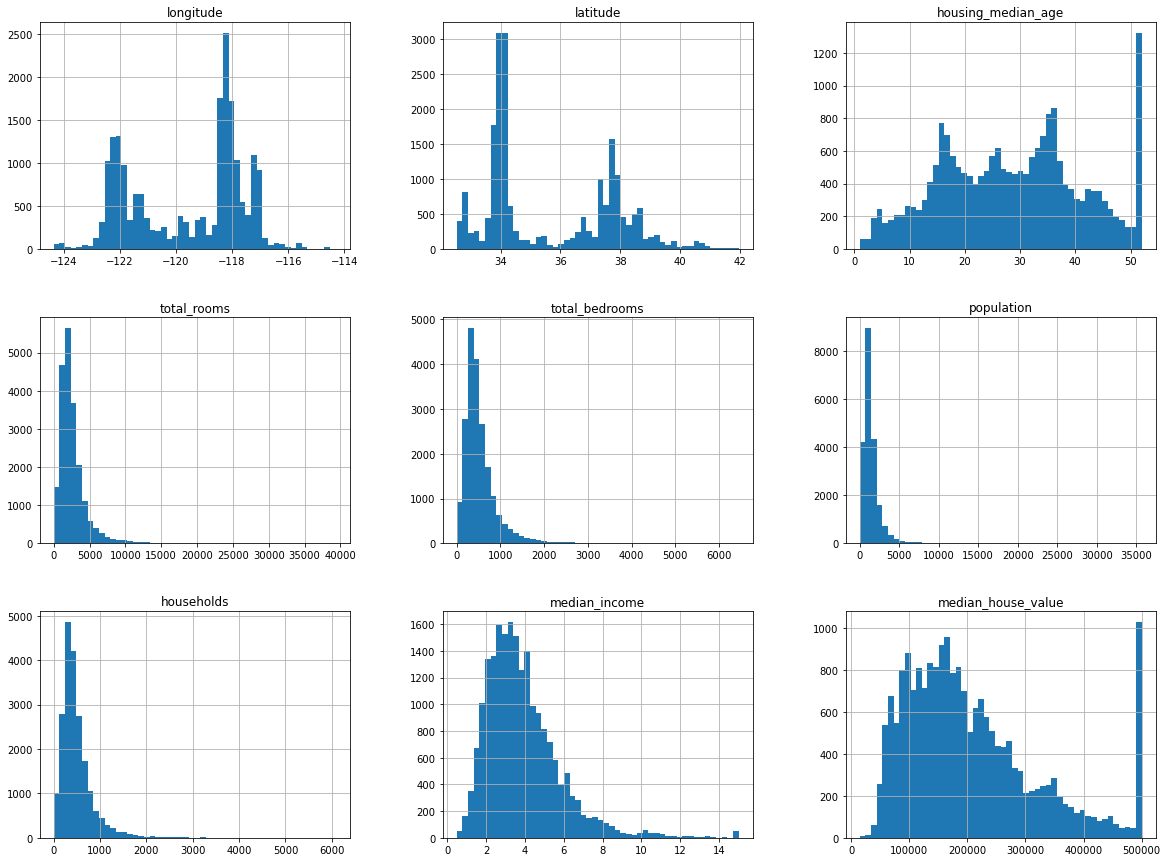

In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

---------------------------
------------------------

# Missing Data
Dealing with missing data is a frequent task when working with real life data. Pandas offers a few tools to handle missing data.

In [92]:
print(housing.shape)

# the number of non NA is each column

print(housing.count())

(20640, 10)
longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20433
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
dtype: int64


Display the number of nan by columns

In [4]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

We can diplay samples with nan attributes

In [61]:
housing[housing.isnull().any(axis=1)]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290      -122.16     37.77                47.0       1256.0             NaN   
341      -122.17     37.75                38.0        992.0             NaN   
538      -122.28     37.78                29.0       5154.0             NaN   
563      -122.24     37.75                45.0        891.0             NaN   
696      -122.10     37.69                41.0        746.0             NaN   
...          ...       ...                 ...          ...             ...   
20267    -119.19     34.20                18.0       3620.0             NaN   
20268    -119.18     34.19                19.0       2393.0             NaN   
20372    -118.88     34.17                15.0       4260.0             NaN   
20460    -118.75     34.29                17.0       5512.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   

       population  households  median_income  median_house_value  \
290         570.0       218.0         4.3750            161900.0   
341         732.0       259.0         1.6196             85100.0   
538        3741.0      1273.0         2.5762            173400.0   
563         384.0       146.0         4.9489            247100.0   
696         387.0       161.0         3.9063            178400.0   
...           ...         ...            ...                 ...   
20267      3171.0       779.0         3.3409            220500.0   
20268      1938.0       762.0         1.6953            167400.0   
20372      1701.0       669.0         5.1033            410700.0   
20460      2734.0       814.0         6.6073            258100.0   
20484      1705.0       495.0         5.7376            218600.0   

      ocean_proximity  
290          NEAR BAY  
341          NEAR BAY  
538          NEAR BAY  
563          NEAR BAY  
696          NEAR BAY  
...               ...  
20267      NEAR OCEAN  
20268      NEAR OCEAN  
20372       <1H OCEAN  
20460       <1H OCEAN  
20484       <1H OCEAN  

[207 rows x 10 columns]

`Option 1`: We can drop nan samples (row)

In [5]:
housing.dropna()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20433 rows x 10 columns]

We can set some thresh on a row to have at least thresh no Nan values

In [37]:
# the row should have at least thresh no Nan value
housing.dropna(thresh=7)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

`Option 2`: We can drop columns with nan (total_bedrooms)

In [76]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
housing.drop(labels="total_bedrooms",axis=1)
# equiv to housing.dropna(axis=1)

longitude  latitude  housing_median_age  total_rooms  population  \
0        -122.23     37.88                41.0        880.0       322.0   
1        -122.22     37.86                21.0       7099.0      2401.0   
2        -122.24     37.85                52.0       1467.0       496.0   
3        -122.25     37.85                52.0       1274.0       558.0   
4        -122.25     37.85                52.0       1627.0       565.0   
...          ...       ...                 ...          ...         ...   
20635    -121.09     39.48                25.0       1665.0       845.0   
20636    -121.21     39.49                18.0        697.0       356.0   
20637    -121.22     39.43                17.0       2254.0      1007.0   
20638    -121.32     39.43                18.0       1860.0       741.0   
20639    -121.24     39.37                16.0       2785.0      1387.0   

       households  median_income  median_house_value ocean_proximity  
0           126.0         8.3252            452600.0        NEAR BAY  
1          1138.0         8.3014            358500.0        NEAR BAY  
2           177.0         7.2574            352100.0        NEAR BAY  
3           219.0         5.6431            341300.0        NEAR BAY  
4           259.0         3.8462            342200.0        NEAR BAY  
...           ...            ...                 ...             ...  
20635       330.0         1.5603             78100.0          INLAND  
20636       114.0         2.5568             77100.0          INLAND  
20637       433.0         1.7000             92300.0          INLAND  
20638       349.0         1.8672             84700.0          INLAND  
20639       530.0         2.3886             89400.0          INLAND  

[20640 rows x 9 columns]

`Option 3`: Filling with a given value

In [38]:
housing.fillna(value=99999)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

`Option 4`: Filling with forward method (column based): propagate last valid observation forward to next valid

In [40]:
housing.fillna(method='ffill')

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

`Option 5`: Filling with backword method

In [42]:
housing.fillna(method='bfill')

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

`Option 6`: Filling with mean or the median 

In [7]:
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(value=median, inplace=True)

`Option 7`: We can also interpolate this column. By default, it interpolates vertically (axis=0), so let's tell it to interpolate horizontally (axis=1).

In [46]:
housing.interpolate(axis=0,limit_direction='both')

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

`Option 8`: Apply a costumize function for filling

In [8]:
median = housing['total_bedrooms'].median()
mean = housing['total_bedrooms'].mean()

housing['total_bedrooms'] = housing['total_bedrooms'].apply(lambda x : median if np.isnan(x)  else x)

Drop duplicate samples

In [103]:
housing.drop_duplicates()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

-----------
-----------------

# Grouping Data

The groupby method allows you to group rows of data together and call aggregate functions

Display unique values of ocean_proximity

In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [11]:
#number of unique values
housing['ocean_proximity'].nunique()

5

In [96]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Let us see how the mean house price changes with ocean proximity

In [12]:
df_ocean = housing.groupby("ocean_proximity") # mutli agregation is also possible

In [13]:
type(df_ocean)

pandas.core.groupby.generic.DataFrameGroupBy

The DataFrameGroupby is like a dict or table where the keys are the modalitie of 'ocean_proximity' column and the values are frames containing rows corresponding to this modality

In [14]:
for ocean, frame in df_ocean:
    print(f"First 2 entries for {ocean!r}")
    print("------------------------")
    print(frame.head(2), end="\n\n")

First 2 entries for '<1H OCEAN'
------------------------
     longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
701    -121.97     37.64                32.0       1283.0           194.0   
830    -121.99     37.61                 9.0       3666.0           711.0   

     population  households  median_income  median_house_value ocean_proximity  
701       485.0       171.0         6.0574            431000.0       <1H OCEAN  
830      2341.0       703.0         4.6458            217000.0       <1H OCEAN  

First 2 entries for 'INLAND'
------------------------
     longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
954    -121.92     37.64                46.0       1280.0           209.0   
957    -121.90     37.66                18.0       7397.0          1137.0   

     population  households  median_income  median_house_value ocean_proximity  
954       512.0       208.0         5.1406            315600.0          INLAND  
957      3126.0    

One term that’s frequently used alongside .groupby() is split-apply-combine. This refers to a chain of three steps:

- Split a table into groups
- Apply some operations to each of those smaller tables
- Combine the results

You can display the indices

In [113]:
#indices of groups
df_ocean.indices

{'<1H OCEAN': array([  701,   830,   859, ..., 20504, 20505, 20506], dtype=int64),
 'INLAND': array([  954,   957,   965, ..., 20637, 20638, 20639], dtype=int64),
 'ISLAND': array([8314, 8315, 8316, 8317, 8318], dtype=int64),
 'NEAR BAY': array([    0,     1,     2, ..., 19069, 19077, 19104], dtype=int64),
 'NEAR OCEAN': array([ 1850,  1851,  1852, ..., 20423, 20424, 20425], dtype=int64)}

In [114]:
df_ocean.groups

{'<1H OCEAN': [701, 830, 859, 860, 861, 862, 863, 870, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 910, 912, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 945, 946, 947, 948, 949, 950, 951, 952, 953, 955, 956, 958, 959, 960, 961, 962, 963, 964, 966, 971, 972, 978, 989, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, ...], 'INLAND': [954, 957, 965, 967, 968, 969, 970, 973, 974, 975, 976, 977, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 10

In [117]:
df_ocean.describe()['median_house_value']

count           mean            std       min       25%  \
ocean_proximity                                                             
<1H OCEAN        9136.0  240084.285464  106124.292213   17500.0  164100.0   
INLAND           6551.0  124805.392001   70007.908494   14999.0   77500.0   
ISLAND              5.0  380440.000000   80559.561816  287500.0  300000.0   
NEAR BAY         2290.0  259212.311790  122818.537064   22500.0  162500.0   
NEAR OCEAN       2658.0  249433.977427  122477.145927   22500.0  150000.0   

                      50%       75%       max  
ocean_proximity                                
<1H OCEAN        214850.0  289100.0  500001.0  
INLAND           108500.0  148950.0  500001.0  
ISLAND           414700.0  450000.0  450000.0  
NEAR BAY         233800.0  345700.0  500001.0  
NEAR OCEAN       229450.0  322750.0  500001.0

And then call aggregate methods off the object:

In [118]:
#Only Numerical columns
df_ocean.mean()

longitude   latitude  housing_median_age  total_rooms  \
ocean_proximity                                                           
<1H OCEAN       -118.847766  34.560577           29.279225  2628.343586   
INLAND          -119.732990  36.731829           24.271867  2717.742787   
ISLAND          -118.354000  33.358000           42.400000  1574.600000   
NEAR BAY        -122.260694  37.801057           37.730131  2493.589520   
NEAR OCEAN      -119.332555  34.738439           29.347254  2583.700903   

                 total_bedrooms   population  households  median_income  \
ocean_proximity                                                           
<1H OCEAN            546.539185  1520.290499  517.744965       4.230682   
INLAND               533.881619  1391.046252  477.447565       3.208996   
ISLAND               420.400000   668.000000  276.600000       2.744420   
NEAR BAY             514.182819  1230.317467  488.616157       4.172885   
NEAR OCEAN           538.615677  1354.008653  501.244545       4.005785   

                 median_house_value  
ocean_proximity                      
<1H OCEAN             240084.285464  
INLAND                124805.392001  
ISLAND                380440.000000  
NEAR BAY              259212.311790  
NEAR OCEAN            249433.977427

More examples of aggregate methods:

In [119]:
df_ocean.std()

longitude  latitude  housing_median_age  total_rooms  \
ocean_proximity                                                         
<1H OCEAN         1.588888  1.467127           11.644453  2160.463696   
INLAND            1.900950  2.116073           12.018020  2385.831111   
ISLAND            0.070569  0.040866           13.164346   707.545264   
NEAR BAY          0.147004  0.185434           13.070385  1830.817022   
NEAR OCEAN        2.327307  2.275386           11.840371  1990.724760   

                 total_bedrooms   population  households  median_income  \
ocean_proximity                                                           
<1H OCEAN            427.911417  1185.848357  392.280718       2.001223   
INLAND               446.117778  1168.670126  392.252095       1.437465   
ISLAND               169.320111   301.691067  113.200265       0.444180   
NEAR BAY             367.887605   885.899035  350.598369       2.017427   
NEAR OCEAN           376.320045  1005.563166  344.445256       2.010558   

                 median_house_value  
ocean_proximity                      
<1H OCEAN             106124.292213  
INLAND                 70007.908494  
ISLAND                 80559.561816  
NEAR BAY              122818.537064  
NEAR OCEAN            122477.145927

In [120]:
#non-Na values
df_ocean.count()

longitude  latitude  housing_median_age  total_rooms  \
ocean_proximity                                                         
<1H OCEAN             9136      9136                9136         9136   
INLAND                6551      6551                6551         6551   
ISLAND                   5         5                   5            5   
NEAR BAY              2290      2290                2290         2290   
NEAR OCEAN            2658      2658                2658         2658   

                 total_bedrooms  population  households  median_income  \
ocean_proximity                                                          
<1H OCEAN                  9034        9136        9136           9136   
INLAND                     6496        6551        6551           6551   
ISLAND                        5           5           5              5   
NEAR BAY                   2270        2290        2290           2290   
NEAR OCEAN                 2628        2658        2658           2658   

                 median_house_value  
ocean_proximity                      
<1H OCEAN                      9136  
INLAND                         6551  
ISLAND                            5  
NEAR BAY                       2290  
NEAR OCEAN                     2658

In [121]:
df_ocean.count().reset_index()

ocean_proximity  longitude  latitude  housing_median_age  total_rooms  \
0       <1H OCEAN       9136      9136                9136         9136   
1          INLAND       6551      6551                6551         6551   
2          ISLAND          5         5                   5            5   
3        NEAR BAY       2290      2290                2290         2290   
4      NEAR OCEAN       2658      2658                2658         2658   

   total_bedrooms  population  households  median_income  median_house_value  
0            9034        9136        9136           9136                9136  
1            6496        6551        6551           6551                6551  
2               5           5           5              5                   5  
3            2270        2290        2290           2290                2290  
4            2628        2658        2658           2658                2658

In [112]:
df_ocean.get_group('INLAND').mean()

longitude               -119.732990
latitude                  36.731829
housing_median_age        24.271867
total_rooms             2717.742787
total_bedrooms           533.881619
population              1391.046252
households               477.447565
median_income              3.208996
median_house_value    124805.392001
dtype: float64

In [123]:
df_ocean.get_group('INLAND').columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [127]:
# the original index are used
df_ocean.get_group('INLAND')[['median_income']].mean()

median_income    3.208996
dtype: float64

---------------------------
----------------------
# Binning data


When dealing with continuous numeric data, it is often helpful to bin the data into multiple buckets for further analysis. There are several different terms for binning including bucketing, discrete binning, discretization or quantization. Pandas supports these approaches using the cut and qcut functions

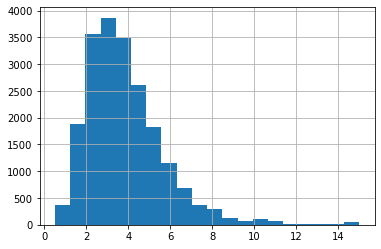

In [17]:
_ = housing["median_income"].hist(bins=20)

One of the most common instances of binning is done behind the scenes for you when creating a histogram. The histogram above of 'median income' data, shows how a continuous set can be divided into discrete bins (for example: $2 - $4) and then used to group and count account instances.

There are many other scenarios where you may want to define your own bins. In the example above, there are 8 bins with data. What if we wanted to divide our customers into 3, 4 or 5 groupings

## qcut

The pandas documentation describes qcut as a “Quantile-based discretization function.” This basically means that qcut tries to divide up the underlying data into equal sized bins. The function defines the bins using percentiles based on the distribution of the data, not the actual numeric edges of the bins.

In [136]:
pd.qcut(housing["median_income"],5)

0          (5.11, 15.0]
1          (5.11, 15.0]
2          (5.11, 15.0]
3          (5.11, 15.0]
4        (3.141, 3.967]
              ...      
20635    (0.499, 2.352]
20636    (2.352, 3.141]
20637    (0.499, 2.352]
20638    (0.499, 2.352]
20639    (2.352, 3.141]
Name: median_income, Length: 20640, dtype: category
Categories (5, interval[float64]): [(0.499, 2.352] < (2.352, 3.141] < (3.141, 3.967] < (3.967, 5.11] < (5.11, 15.0]]

In [143]:
housing['median_income_5'] = pd.qcut(housing["median_income"],5,precision=2)
housing['median_income_4'] = pd.qcut(housing["median_income"],4)
housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity median_income_5 median_income_4  
0            NEAR BAY    (5.11, 15.0]   (4.743, 15.0]  
1            NEAR BAY    (5.11, 15.0]   (4.743, 15.0]  
2            NEAR BAY    (5.11, 15.0]   (4.743, 15.0]  
3            NEAR BAY    (5.11, 15.0]   (4.743, 15.0]  
4            NEAR BAY    (3.14, 3.97]  (3.535, 4.743]  
...               ...             ...             ...  
20635          INLAND    (0.49, 2.35]  (0.499, 2.563]  
20636          INLAND    (2.35, 3.14]  (0.499, 2.563]  
20637          INLAND    (0.49, 2.35]  (0.499, 2.563]  
20638          INLAND    (0.49, 2.35]  (0.499, 2.563]  
20639          INLAND    (2.35, 3.14]  (0.499, 2.563]  

[20640 rows x 12 columns]

In [146]:
housing['median_income_5'].value_counts()

2    4131
1    4130
5    4128
4    4128
3    4123
Name: median_income_5, dtype: int64

In [152]:
housing['median_income_5'] = pd.qcut(housing["median_income"], q=[0, .3, .5, .6, .9, 1], labels=[1,2,3,4,5])
housing['median_income_4'] = pd.qcut(housing["median_income"],4,labels=[1,2,3,4])

<AxesSubplot:>

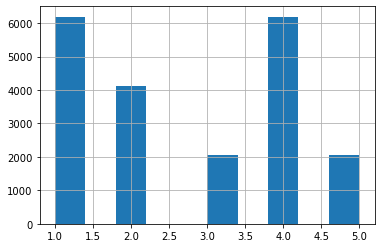

In [153]:
housing['median_income_5'].hist()

This quantilization can be problematic since it is based on the data distribution (no shift between test and train)

## cut

The major distinction is that qcut will calculate the size of each bin in order to make sure the distribution of data in the bins is equal. In other words, all bins will have (roughly) the same number of observations but the bin range will vary.

On the other hand, cut is used to specifically define the bin edges. There is no guarantee about the distribution of items in each bin. In fact, you can define bins in such a way that no items are included in a bin or nearly all items are in a single bin.

In real world examples, bins may be defined by business rules. 

In [18]:
housing["income_cat_cut"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [19]:
housing["income_cat_cut"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat_cut, dtype: int64

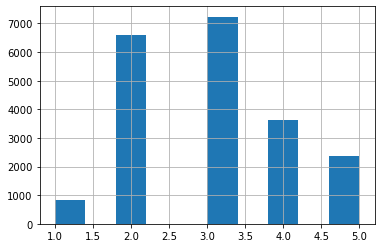

In [20]:
_=housing["income_cat_cut"].hist()